In [1]:
import pandas as pd
import numpy as np
import glob
import os
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def extract_val(d, key):
    val_start = d.find(key)
    val_end = val_start + d[val_start:].find(",")
    if val_end < val_start:
        val_end = val_start + d[val_start:].find(")")
    val = d[val_start:val_end].split("=")[1]
    return val.replace("'", "")

def load_logs(logfile):
    with open(logfile, "r") as f:
        data = f.readlines()
    
    retdata = defaultdict(list)
    alg = None
    #port = None
    
    for d in data:
        if "data_kind" in d:
            #d = d.replace("\n", "")
            #d = d.replace(" ", "")
            data_kind = extract_val(d, "data_kind")
            inp_to_eval = extract_val(d, "inp_to_eval")
            nq = int(extract_val(d, "num_queries"))
            wk = extract_val(d, "workload")
            if "port" not in d:
                break
            
            port = int(extract_val(d, "port"))
            skip_likes = int(extract_val(d, "skip_likes"))
            
        if "-->" in d:
            linedata = d.split(" ")
            ehash = linedata[5]
            rt = float(linedata[-1].replace("\n", ""))
            rep = int(linedata[-5])
            qerr = float(linedata[-3].replace("QErr:", ""))
            
            retdata["ehash"].append(ehash)
            retdata["rt"].append(rt)
            retdata["rep"].append(rep)
            retdata["data_kind"].append(str(data_kind))
            retdata["inp_to_eval"].append(inp_to_eval)
            retdata["num_queries"].append(nq)
            retdata["workload"].append(wk)
            retdata["port"].append(port)
            retdata["skip_likes"].append(skip_likes)
            retdata["qerr"].append(qerr)
            
    df = pd.DataFrame(retdata)
    return df

In [3]:
LOGDIR = "../results/"

In [4]:
fns = glob.glob(LOGDIR + "*.log")
dfs = []

for fn in fns:
    df = load_logs(fn)
    dfs.append(df)

In [5]:
df = pd.concat(dfs)

In [6]:
print(set(df["data_kind"]), set(df["inp_to_eval"]))
df

{'test_shuffle', 'true_cols', 'random_domain', 'gen_shuffle'} {'n'}


,ehash,rt,rep,data_kind,inp_to_eval,num_queries,workload,port,skip_likes,qerr
0,1412706111350165054529954383171903240337882399016,0.147721,0,true_cols,n,-1,ceb,5432,0,1.000000
1,845697540102295928657811596227970506096002273384,0.374068,0,true_cols,n,-1,ceb,5432,0,2.545024
2,428479027960649776600128440654385951132899596406,0.141999,0,true_cols,n,-1,ceb,5432,0,1.842938
3,84075949613328714275869842821526357397337767243,0.134864,0,true_cols,n,-1,ceb,5432,0,1.000000
4,1331203710710213837019143823676324531895931998752,0.237077,0,true_cols,n,-1,ceb,5432,0,1.760590
...,...,...,...,...,...,...,...,...,...,...
5902,439704523988984073426306494580171553674758500032,0.163862,2,gen_shuffle,n,-1,ceb,5432,1,1.003281
5903,192633681206327961501807955265909430115717286834,0.308733,2,gen_shuffle,n,-1,ceb,5432,1,3.553620
5904,724812578734565542787298092023215125474256851349,0.202378,2,gen_shuffle,n,-1,ceb,5432,1,1.001886
5905,1401399880058590412812425297033993446448895271437,0.163751,2,gen_shuffle,n,-1,ceb,5432,1,2.533271


In [7]:
df.head(20)

,ehash,rt,rep,data_kind,inp_to_eval,num_queries,workload,port,skip_likes,qerr
0,1412706111350165054529954383171903240337882399016,0.147721,0,true_cols,n,-1,ceb,5432,0,1.000000
1,845697540102295928657811596227970506096002273384,0.374068,0,true_cols,n,-1,ceb,5432,0,2.545024
2,428479027960649776600128440654385951132899596406,0.141999,0,true_cols,n,-1,ceb,5432,0,1.842938
3,84075949613328714275869842821526357397337767243,0.134864,0,true_cols,n,-1,ceb,5432,0,1.000000
4,1331203710710213837019143823676324531895931998752,0.237077,0,true_cols,n,-1,ceb,5432,0,1.760590
5,245567878873194242657445459190732968648046452375,0.171676,0,true_cols,n,-1,ceb,5432,0,1.000000
6,210635630207353766926105806895126572953778731580,0.171649,0,true_cols,n,-1,ceb,5432,0,1.000000
7,877418176093611481247246328922657287730363543589,0.190360,0,true_cols,n,-1,ceb,5432,0,2.622051
8,294324390006675332591232738838468942434694986688,0.385862,0,true_cols,n,-1,ceb,5432,0,1.000000
9,1275547412122735094756863427176823716568525482046,0.280942,0,true_cols,n,-1,ceb,5432,0,1.831953


In [8]:
# tmp = df[df.data_kind == "gen_shuffle"]
# tmp

In [9]:
print(df.keys())

Index(['ehash', 'rt', 'rep', 'data_kind', 'inp_to_eval', 'num_queries',
       'workload', 'port', 'skip_likes', 'qerr'],
      dtype='object')


In [10]:
#df = df[df.data_kind != 'random_domain']
#df = df[df.data_kind != 'random_domain']
df = df[df.data_kind != 'test']
df = df[df.data_kind != 'test_shuffle']
df = df[df.inp_to_eval == 'n']
#df = df[df.num_queries == 100]
df = df[df["skip_likes"] == 0]
df = df[df.port == 5432]

In [11]:
df.keys()

Index(['ehash', 'rt', 'rep', 'data_kind', 'inp_to_eval', 'num_queries',
       'workload', 'port', 'skip_likes', 'qerr'],
      dtype='object')

In [12]:
print(set(df["data_kind"]))
df.head(5)

{'random_domain', 'true_cols', 'gen_shuffle'}


,ehash,rt,rep,data_kind,inp_to_eval,num_queries,workload,port,skip_likes,qerr
0,1412706111350165054529954383171903240337882399016,0.147721,0,true_cols,n,-1,ceb,5432,0,1.000000
1,845697540102295928657811596227970506096002273384,0.374068,0,true_cols,n,-1,ceb,5432,0,2.545024
2,428479027960649776600128440654385951132899596406,0.141999,0,true_cols,n,-1,ceb,5432,0,1.842938
3,84075949613328714275869842821526357397337767243,0.134864,0,true_cols,n,-1,ceb,5432,0,1.000000
4,1331203710710213837019143823676324531895931998752,0.237077,0,true_cols,n,-1,ceb,5432,0,1.760590


In [13]:
print(set(df["num_queries"]))

{-1}


In [14]:
mapping = {}
mapping["true_cols"] = "True Data"
mapping["test_shuffle2"] = "Our Gen Data"
mapping["random_domain"] = "Uniform Domain Data"
mapping["gen_shuffle"] = "Our Gen Data 2"
df["data_kind"] = df.apply(lambda x: mapping[x["data_kind"]] , axis=1)

In [22]:
tmp = df[df["data_kind"] == "True Data"]
tmp = tmp.groupby("ehash")["qerr"].mean().reset_index()
qerr_base = pd.Series(tmp.qerr.values,index=tmp.ehash).to_dict()

In [24]:
df["qerr"] = df.apply(lambda x: max(x["qerr"] / qerr_base[x["ehash"]], (qerr_base[x["ehash"]] / x["qerr"])) ,axis=1)

In [26]:
df.groupby(["data_kind"])["qerr"].describe(percentiles=[0.9, 0.99])

,count,mean,std,min,50%,90%,99%,max
data_kind,,,,,,,,
Our Gen Data 2,6684.0,976.260576,9.802023e+03,1.0,1.003281,2.653109,21161.0,228716.0
True Data,6684.0,1.000000,5.088714e-17,1.0,1.000000,1.000000,1.0,1.0
Uniform Domain Data,6684.0,1179.621992,1.075890e+04,1.0,1.542867,6.174906,38388.0,228716.0


In [46]:
df.groupby(["data_kind"])["rt"].sum()

data_kind
Our Gen Data 2         1246.711752
True Data              1285.171191
Uniform Domain Data    1487.327800
Name: rt, dtype: float64

In [28]:
df.groupby(["data_kind"])["rt"].describe(percentiles=[0.9, 0.99])

,count,mean,std,min,50%,90%,99%,max
data_kind,,,,,,,,
Our Gen Data 2,6684.0,0.186522,0.043141,0.120080,0.171490,0.237340,0.350387,0.391481
True Data,6684.0,0.192276,0.061756,0.129763,0.165009,0.282159,0.408757,0.533781
Uniform Domain Data,6684.0,0.222521,0.090566,0.136885,0.180542,0.338956,0.551833,0.624143


In [29]:
tmp = df.groupby(["ehash", "data_kind"])[["rt"]].mean().reset_index()

In [30]:
edf = tmp.set_index(['ehash', 'data_kind'])['rt'].unstack().reset_index()

In [41]:
edf.corr()

data_kind,Our Gen Data 2,True Data,Uniform Domain Data
data_kind,,,
Our Gen Data 2,1.000000,0.888450,0.894503
True Data,0.888450,1.000000,0.949045
Uniform Domain Data,0.894503,0.949045,1.000000


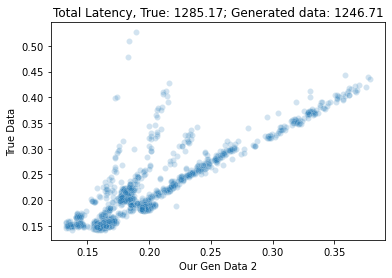

In [47]:
true_rt = round(df.groupby(["data_kind"])["rt"].sum()["True Data"], 2)
gen_rt = round(df.groupby(["data_kind"])["rt"].sum()["Our Gen Data 2"], 2)

title = "Total Latency, True: {}; Generated data: {}".format(true_rt, gen_rt)

sns.scatterplot(data=edf, x = "Our Gen Data 2", y="True Data", alpha=0.2)

plt.title(title)
plt.show()

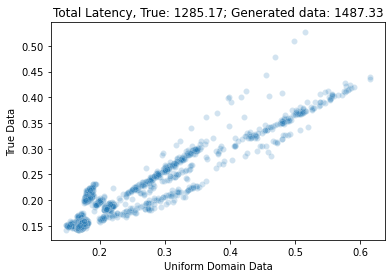

In [48]:
true_rt = round(df.groupby(["data_kind"])["rt"].sum()["True Data"], 2)
gen_rt = round(df.groupby(["data_kind"])["rt"].sum()["Uniform Domain Data"], 2)

title = "Total Latency, True: {}; Generated data: {}".format(true_rt, gen_rt)

sns.scatterplot(data=edf, x = "Uniform Domain Data", y="True Data", alpha=0.2)

plt.title(title)
plt.show()